In [49]:
import pandas
import matplotlib.pyplot as plt

In [42]:
dfDK = pandas.read_csv('Results/DK-Results-Human.csv', dtype=str, keep_default_na=False)
dk = dfDK.copy()
dk

,SurveyName,Tags,Quiet,Headphones,Calibration,Dscr,Excerpt1,Recognized1,NoEmo1,Pleasure1,...,Awakeness4,Sleepiness4,Tension4,Relaxation4,Gender,Old,MusicTime,EducationYN,EducationType,End
0,Name,Date,Quiet,Headphones,Calibration Sound,Dscr 1,Excerpt 1 - Human Tender,Recognized? 1,NoEmo 1,Pleasure 1,...,Awakeness 4,Sleepiness 4,Tension 4,Relaxation 4,Gender,Old,Time on Music,Music Education,What Music Education,End
1,Emotions in Cinematic Music,2023-12-17 22:09:11,I am in a somewhat quiet place,No,,,,No,,None,...,None,Mild,None,Mild,Male,25-34,1 to 3 hours,Yes,Other,


### Drop describtions and useless data

In [58]:
dk.drop(["Calibration","Dscr","NoEmo1","NoEmo2","NoEmo3","NoEmo4","End", "Excerpt1","Excerpt2","Excerpt3","Excerpt4"], axis=1)

,SurveyName,Tags,Quiet,Headphones,Recognized1,Pleasure1,Displeasure1,Awakeness1,Sleepiness1,Tension1,...,Displeasure4,Awakeness4,Sleepiness4,Tension4,Relaxation4,Gender,Old,MusicTime,EducationYN,EducationType
0,Name,Date,Quiet,Headphones,Recognized? 1,Pleasure 1,Displeasure 1,Awakeness 1,Sleepiness 1,Tension 1,...,Displeasure 4,Awakeness 4,Sleepiness 4,Tension 4,Relaxation 4,Gender,Old,Time on Music,Music Education,What Music Education
1,Emotions in Cinematic Music,2023-12-17 22:09:11,I am in a somewhat quiet place,No,No,None,None,Moderete,Very weak,Strong,...,None,None,Mild,None,Mild,Male,25-34,1 to 3 hours,Yes,Other


### Filter Emotions DK
Human Tender - 1st Excerpt  
AI Tender - 2st Excerpt  
AI Relaxed - 3st Excerpt  
Human Relaxed - 4st Excerpt  

In [44]:
humanTenderDK = dk.filter(['Recognized1','Pleasure1','Displeasure1','Awakeness1','Sleepiness1','Tension1', 'Relaxation1'], axis=1)
aiTenderDK = dk.filter(['Recognized2','Pleasure2','Displeasure2','Awakeness2','Sleepiness2','Tension2', 'Relaxation2'], axis=1)
aiRelaxedDK = dk.filter(['Recognized3','Pleasure3','Displeasure3','Awakeness3','Sleepiness3','Tension3', 'Relaxation3'], axis=1)
humanRelaxedDK = dk.filter(['Recognized4','Pleasure4','Displeasure4','Awakeness4','Sleepiness4','Tension4', 'Relaxation4'], axis=1)

In [45]:
humanTenderDK

,Recognized1,Pleasure1,Displeasure1,Awakeness1,Sleepiness1,Tension1,Relaxation1
0,Recognized? 1,Pleasure 1,Displeasure 1,Awakeness 1,Sleepiness 1,Tension 1,Relaxation 1
1,No,None,None,Moderete,Very weak,Strong,None


In [46]:
humanRelaxedDK 

,Recognized4,Pleasure4,Displeasure4,Awakeness4,Sleepiness4,Tension4,Relaxation4
0,Recognized? 4,Pleasure 4,Displeasure 4,Awakeness 4,Sleepiness 4,Tension 4,Relaxation 4
1,No,None,None,None,Mild,None,Mild


In [47]:
aiTenderDK

,Recognized2,Pleasure2,Displeasure2,Awakeness2,Sleepiness2,Tension2,Relaxation2
0,Recognized? 2,Pleasure 2,Displeasure 2,Awakeness 2,Sleepiness 2,Tension 2,Relaxation 2
1,No,None,None,Very weak,Mild,Very weak,Very weak


In [48]:
aiRelaxedDK

,Recognized3,Pleasure3,Displeasure3,Awakeness3,Sleepiness3,Tension3,Relaxation3
0,Recognized? 3,Pleasure 3,Displeasure 3,Awakeness 3,Sleepiness 3,Tension 3,Relaxation 3
1,No,None,None,None,None,None,None


## Data Analysis

In [57]:
# Sprawdzenie czy ktokolwiek rozpoznał

In [ ]:
# Rename emotions to be without numbers in small tables

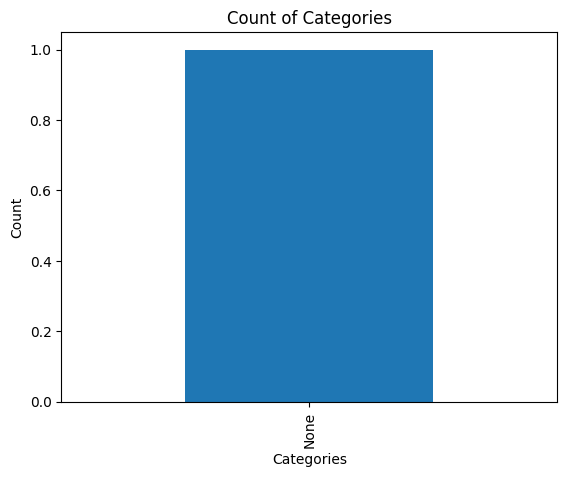

In [63]:
# Write a function which takes dataframe and emotion name and plots everything needed
# Parser from emotions scale to 1-7 values

# plot = aiRelaxedDK.plot(kind='pie', title="My plot", subplots=True)
value_counts = aiRelaxedDK['Pleasure'][1:].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Categories')
plt.show()